# **Exploratory Data Analysis - Diabetes**
## Author: *Rizwan Rizwan*

In [80]:
# import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning) 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [81]:
# load the dataset 
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## About the dataset

**Context**\
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.\
The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Content**\
Several constraints were placed on the selection of these instances from a larger database.\
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**Dataset Attributes**

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: '1' denotes patient having diabetes and '0' denotes patient not having diabetes.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [84]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
print(df.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


500 is rated as 0  (no diabetes)and 268 as 1 (with diabetes):

<Axes: xlabel='Outcome', ylabel='count'>

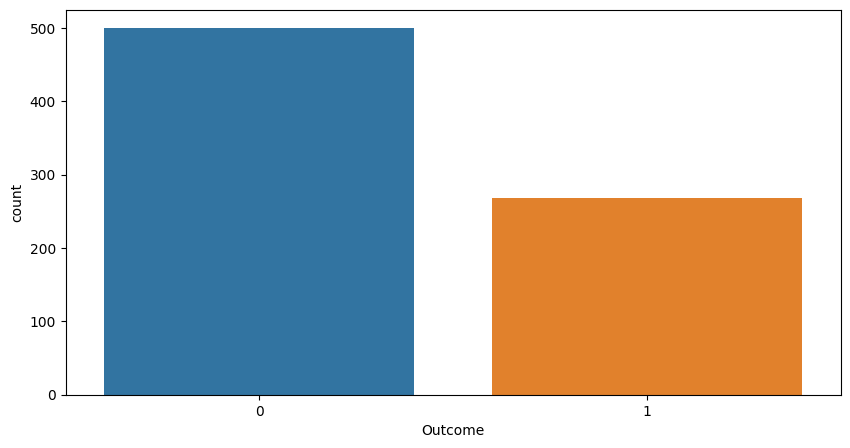

In [86]:
# lets draw this with countplot
sns.countplot(data=df, x='Outcome', label="Count")

In [89]:
# create datarame in Outcome =0 and Outcome=1
df_0=df[df['Outcome']==0]
df_1=df[df['Outcome']==1]

In [91]:
df_0['Age'].mean()

31.19

In [92]:
df_1['Age'].mean()

37.06716417910448

it means diabetes occuring chances are high with age above than 37 years 

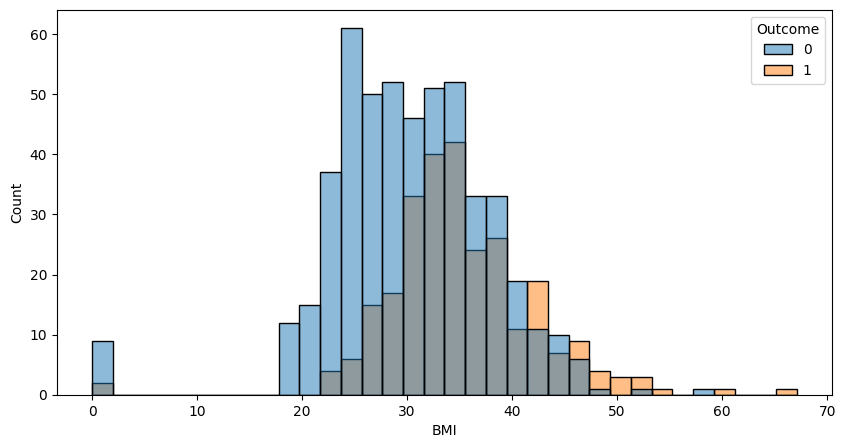

In [93]:
# histogram of BMI

sns.histplot(data=df, x='BMI'  , hue='Outcome')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

In [94]:
# average healthy people BMI 
df_0['BMI'].mean()

30.3042

In [96]:
# maximum healthy people BMI 
df_0['BMI'].max()

57.3

In [97]:
# unhealthy people average BMI 
df_1['BMI'].mean()

35.14253731343284

In [98]:
# unhealthy people maximum BMI 
df_1['BMI'].max()

67.1

it concludes if a person has BMI greater than 58, he/she is likely to have diabetes!

<Axes: xlabel='Pregnancies', ylabel='count'>

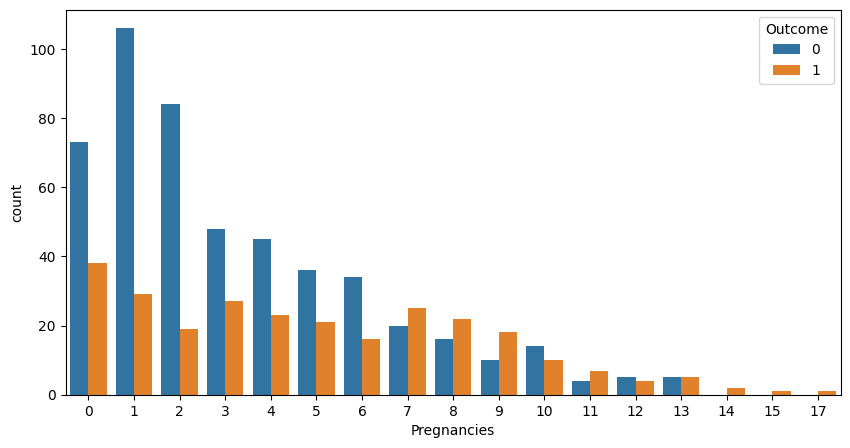

In [100]:
sns.countplot(data= df, x='Pregnancies',hue="Outcome")

In [103]:
# average healthy people pregnancies
df_0['Pregnancies'].mean()

3.298

In [104]:
# maximum healthy people pregnancies
df_0['Pregnancies'].max()

13

In [105]:
# average unhealthy people pregnancies
df_1['Pregnancies'].mean()

4.865671641791045

In [106]:
# average unhealthy people pregnancies 
df_1['Pregnancies'].max()

17

In [110]:
# average healthy people skinThickness
df_0['SkinThickness'].mean()

19.664

In [111]:
# maximum healthy people skinThickness
df_0['SkinThickness'].max()

60

In [112]:
# average unhealthy people skinThickness
df_1['SkinThickness'].mean()

22.16417910447761

In [113]:
# maximum unhealthy people skinThickness
df_1['SkinThickness'].max()

99

It shows skinthickness has significant impact on diabetes. More the tricep skin fold thickness is, it is more likely to get diabetes.

Statistical part of this dataset shows that

Pregnancies: The average number of pregnancies is around 3.84 with a standard deviation of 3.37. The maximum number of pregnancies recorded is 17.\
Glucose: The average glucose level is 120.89 with a standard deviation of 31.97. The minimum value is 0 which is not medically possible and it shows a missing or incorrect data.\
BloodPressure: The average blood pressure is around 69.10 with a standard deviation of 19.36. Similar to glucose, a blood pressure of 0 is not possible and indicates missing or incorrect data.\
SkinThickness: The average skin thickness is around 20.54 with a standard deviation of 15.95. There are also records with skin thickness of 0, which indicates missing or incorrect data.\
Insulin: The average insulin level is around 79.80 with a standard deviation of 115.24. Records with insulin level of 0 also indicate missing or incorrect data.\
BMI: The average BMI is around 31.99 with a standard deviation of 7.88. A BMI of 0 is not possible and indicates missing or incorrect data.\
DiabetesPedigreeFunction: The average value is around 0.47 with a standard deviation of 0.33.\
Age: The average age is around 33.24 with a standard deviation of 11.76.\
Outcome: About 34.9% of the patients in the dataset have diabetes.

It is seen that the minimum values of some variables in the data set are 0. For example, a glucose or insulin value of 0 is a situation that cannot actually happen. Probably the NAN values are replaced with 0. It is a good start for us to detect these values.

In [114]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


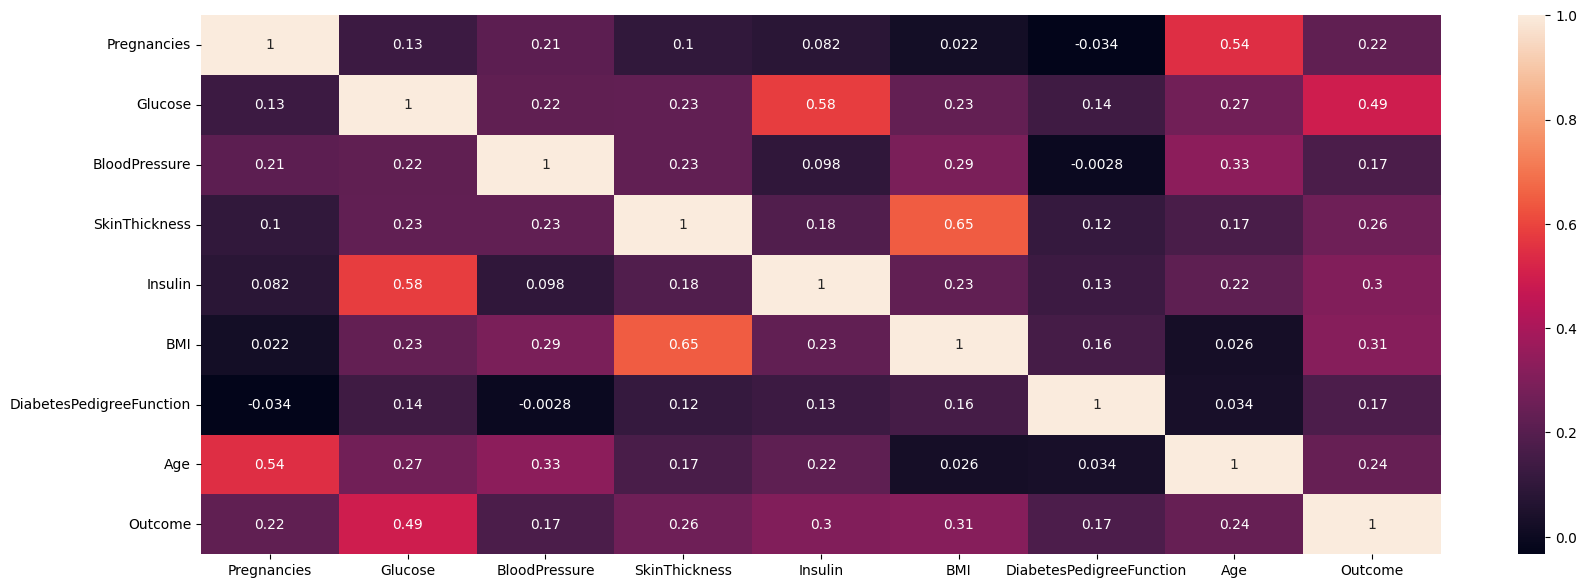

In [115]:
# draw a 2-D correlation heatmap
fig, ax = plt.subplots(figsize=(20, 7))
dataplot = sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

- The correlation coefficient values range from -1 to 1. If the correlation coefficient is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.
- Glucose, Age and BMI are moderately correlated with Outcome.
- Pregnancies and Age show a strong correlation.

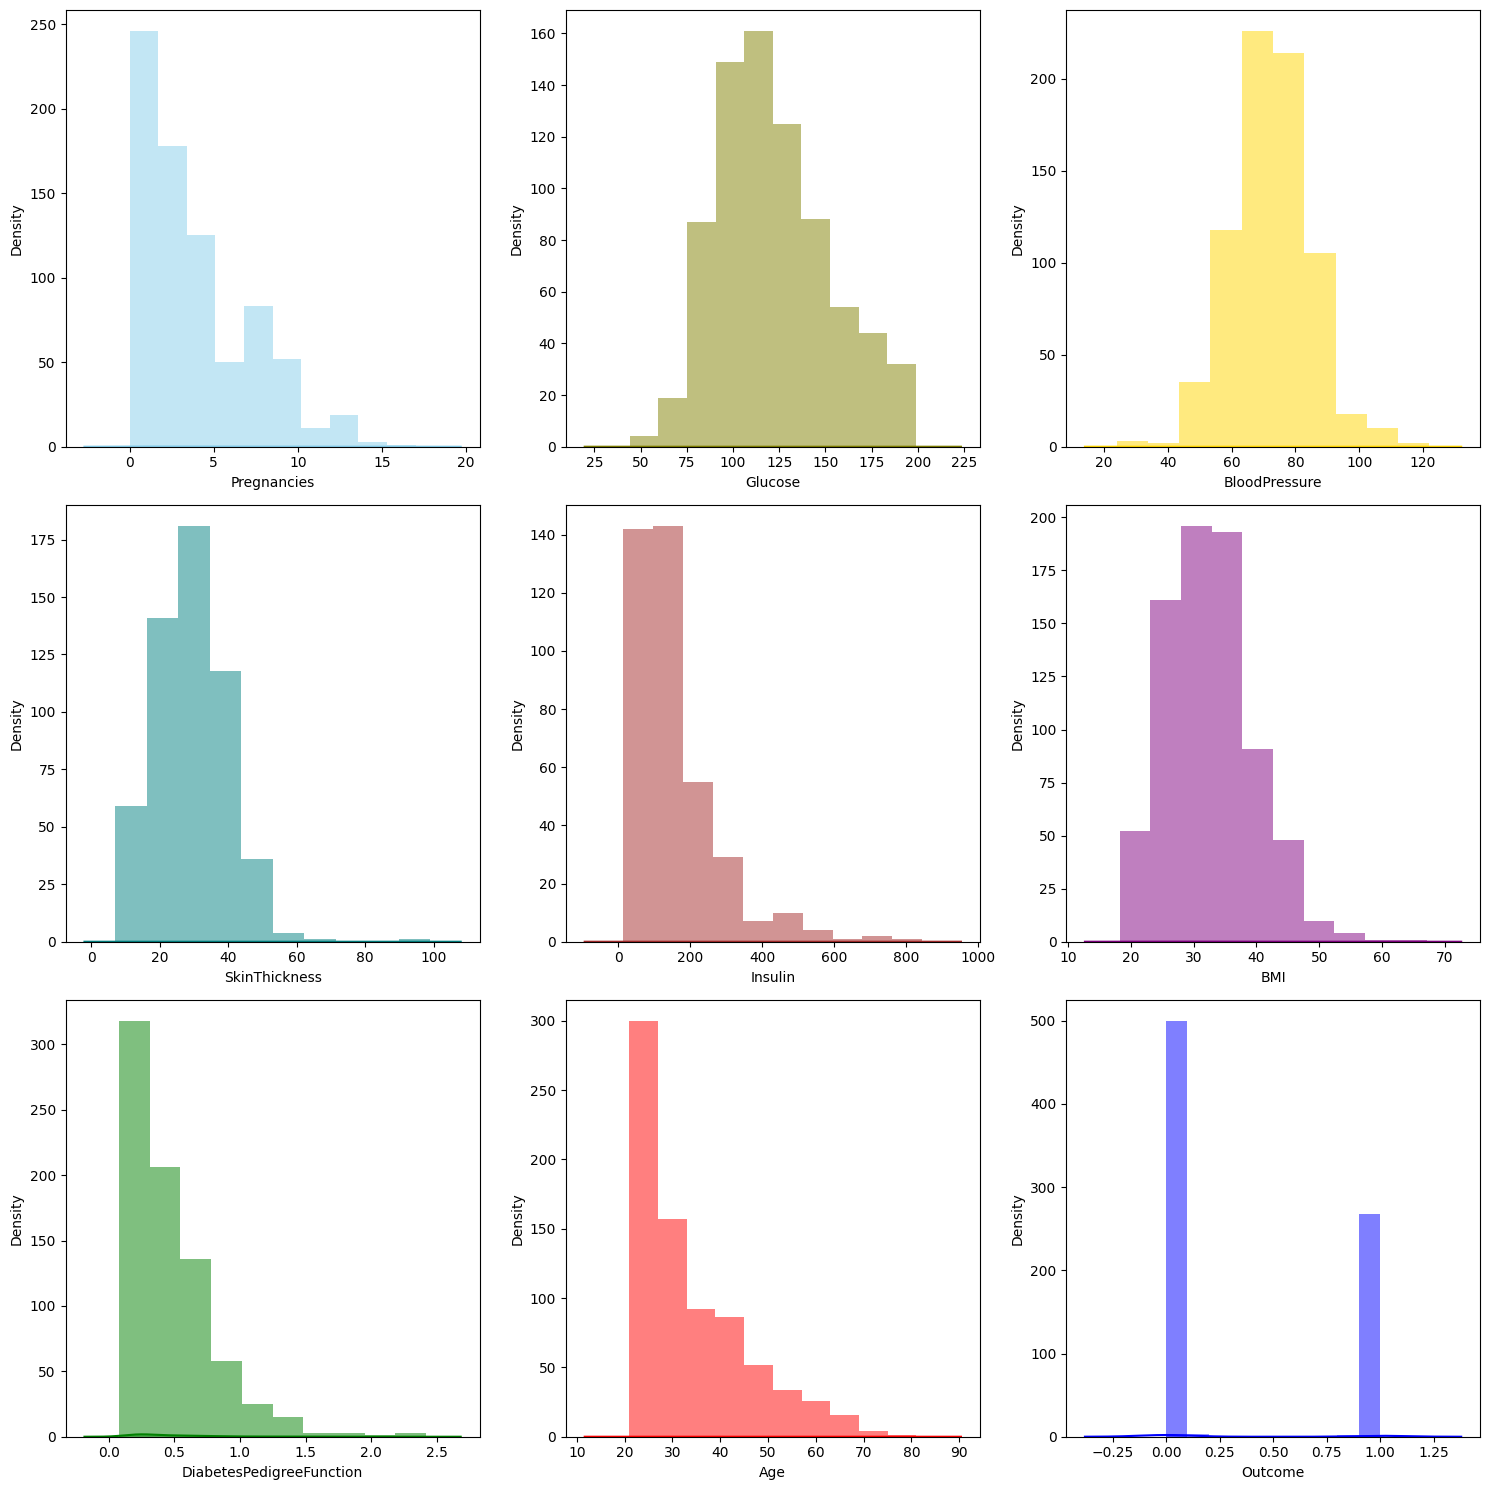

In [116]:
# draw a distplot of each feature
import matplotlib.pyplot as plt
import seaborn as sns
lst1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False) # Set up the matplotlib figure
axes = axes.flatten()  # Plot a simple histogram with binsize determined automatically
for ax,k,m in zip(axes,lst1,lst_col):
    ax.hist(df[k], color=m, bins=10, alpha=0.5)
    sns.distplot(df[k], color=m, ax=ax)
plt.tight_layout()

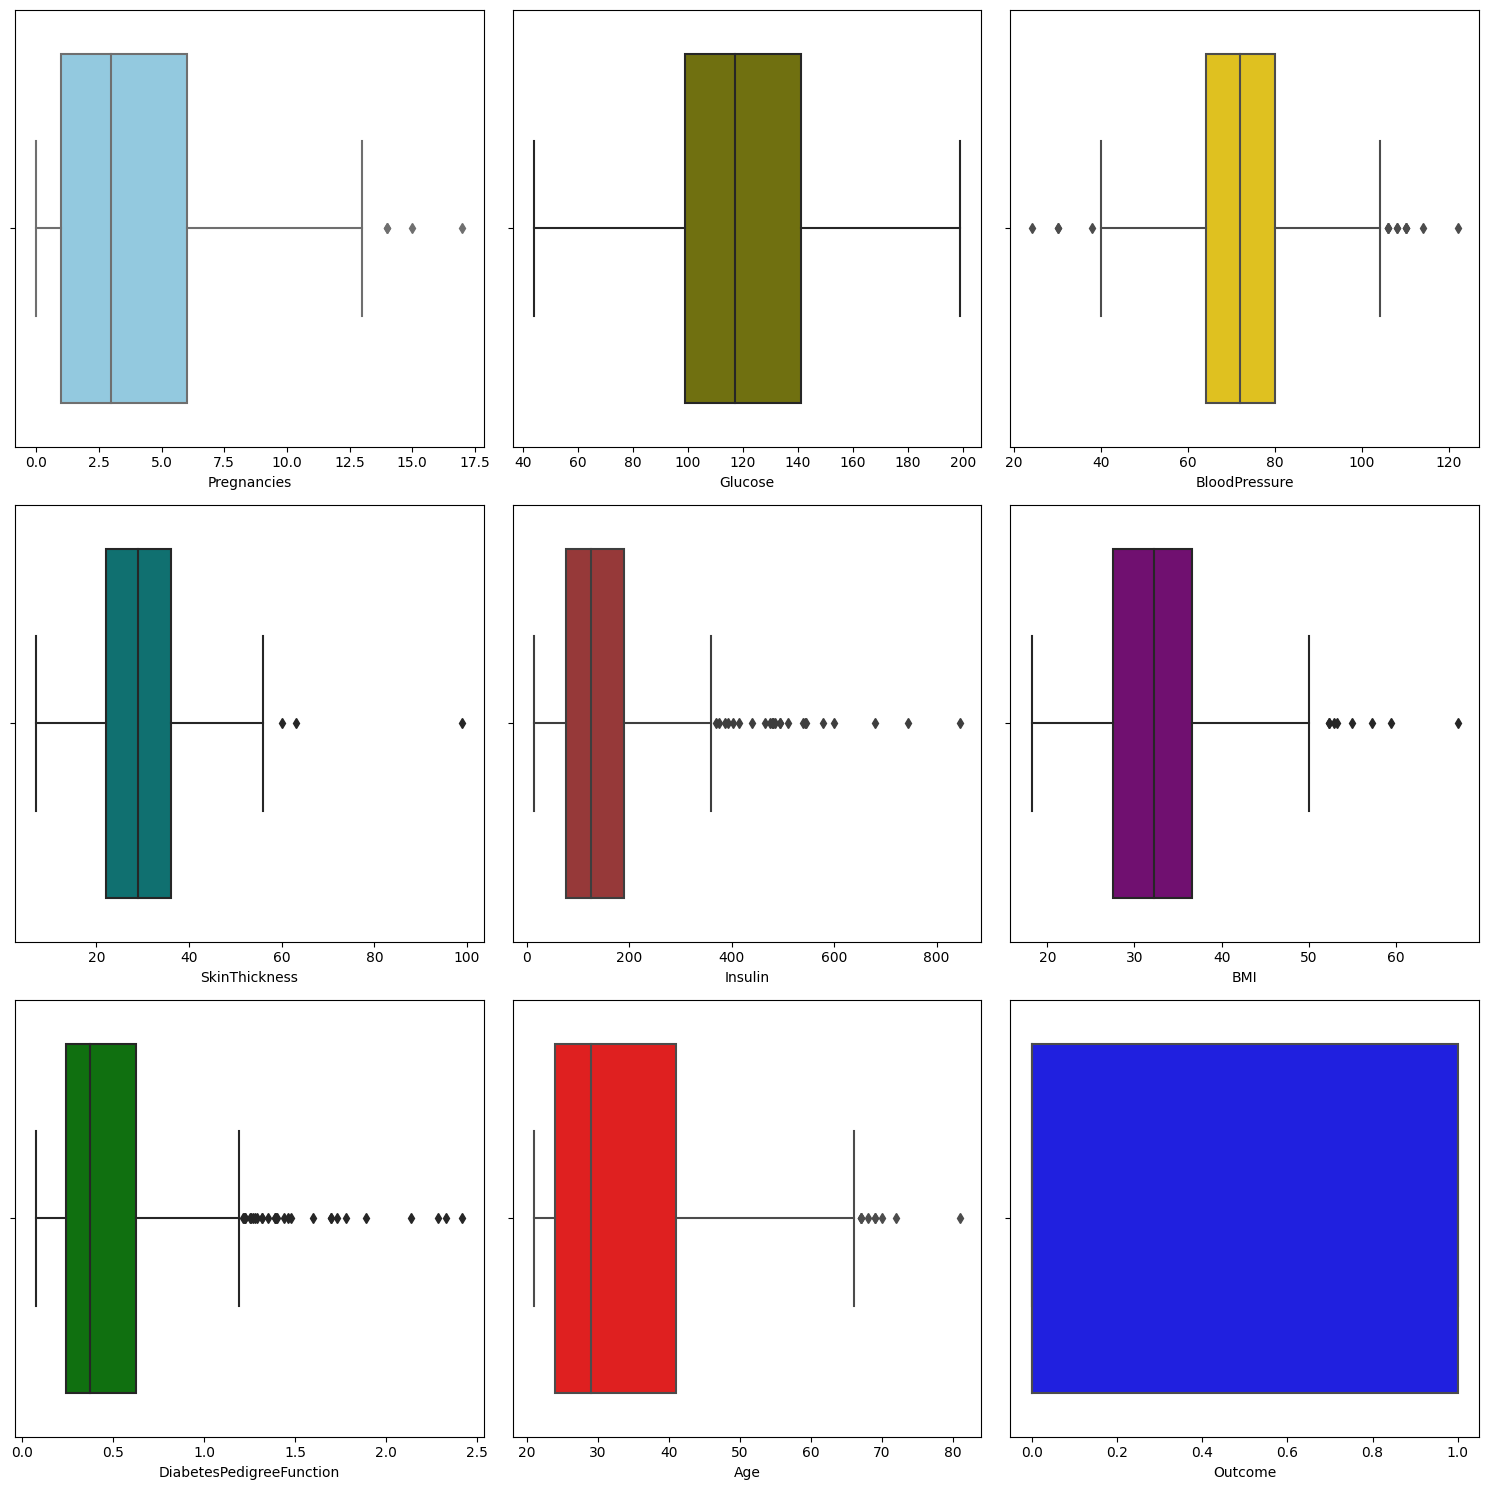

In [117]:
# Generate a box plot for each feature
lst1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False) # Set up the matplotlib figure
axes = axes.flatten()  # Plot a simple histogram with binsize determined automatically
for ax,k,m in zip(axes,lst1,lst_col):
    sns.boxplot(data=df, x=k, color=m, ax=ax)
plt.tight_layout()  
plt.show()

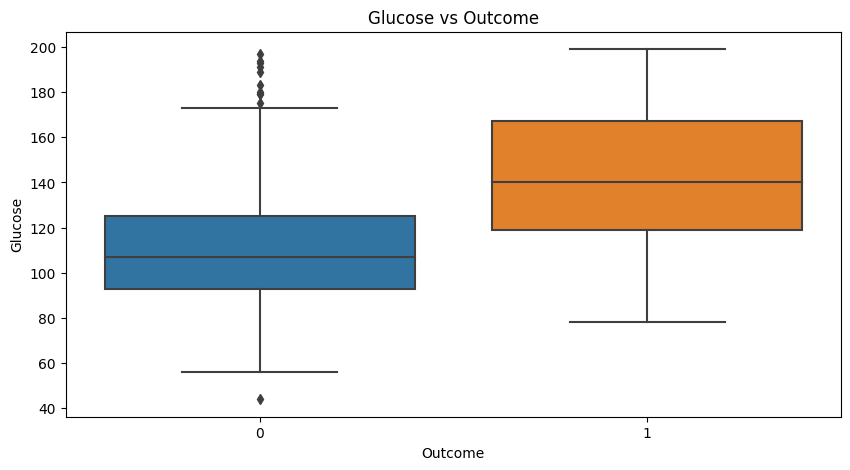

In [118]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose vs Outcome')
plt.show()

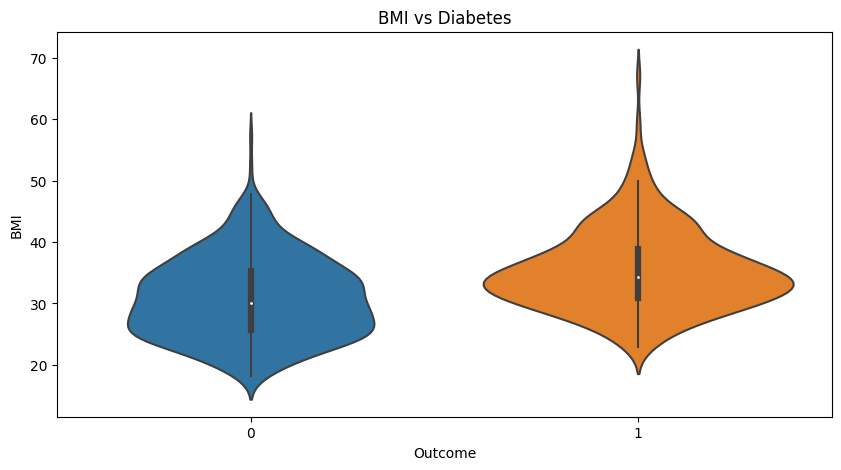

In [119]:
sns.violinplot(x='Outcome', y='BMI', split=True, data=df)
plt.title('BMI vs Diabetes')
plt.show()

<Axes: xlabel='Pregnancies', ylabel='Count'>

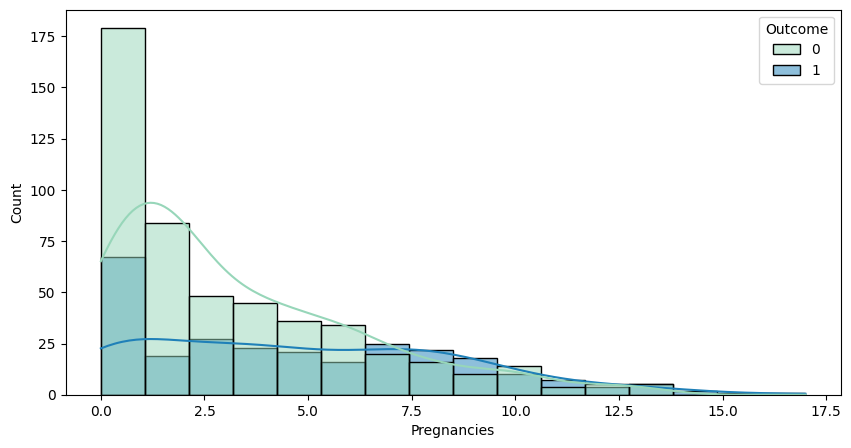

In [120]:
sns.histplot(data=df, x="Pregnancies", hue="Outcome",kde=True,palette="YlGnBu")

<Axes: xlabel='Glucose', ylabel='Count'>

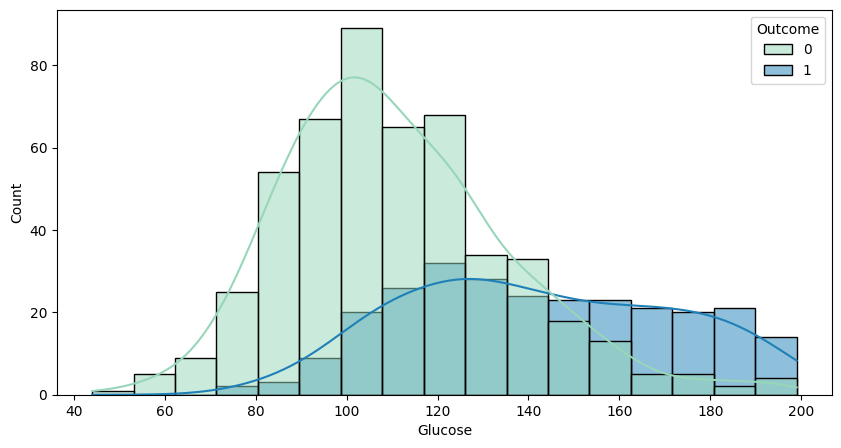

In [ ]:
sns.histplot(data=df, x="Glucose", hue="Outcome",kde=True,palette="YlGnBu")

(0.0, 60.0)

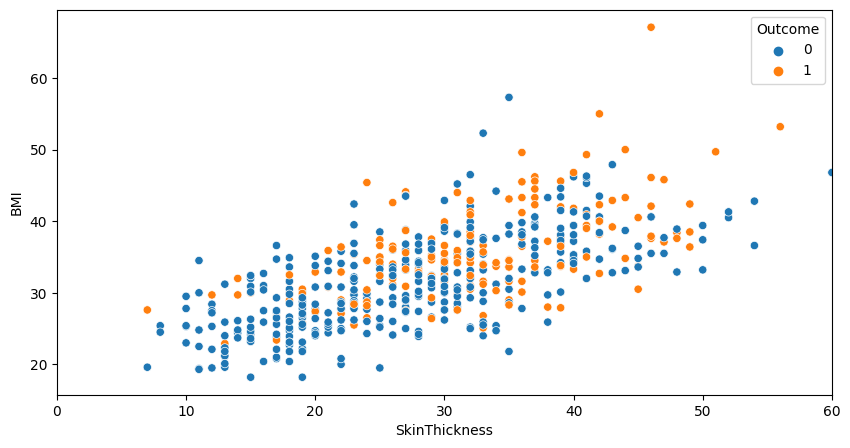

In [122]:
# draw a scatterplot between Skinthickness and Insulin
sns.scatterplot(data=df, x='SkinThickness', y='BMI', hue='Outcome')
plt.xlim(0,60)

<Axes: xlabel='Glucose', ylabel='Insulin'>

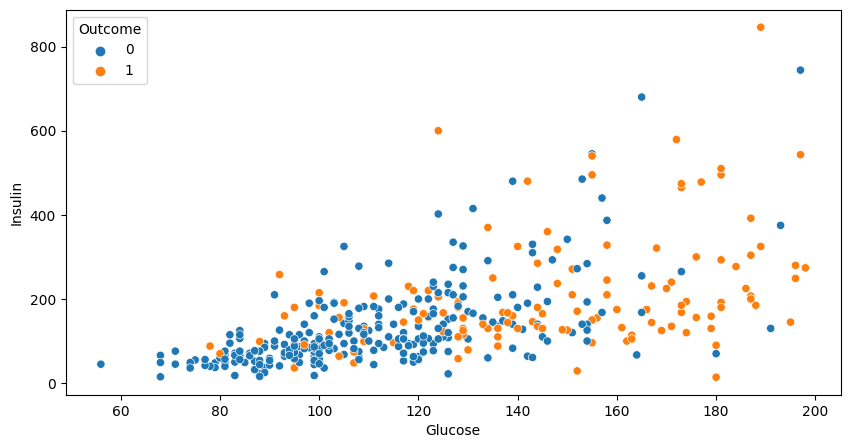

In [123]:
# draw a scatterplot between insulin and glucose 
sns.scatterplot(data=df, y='Insulin', x='Glucose', hue='Outcome')

Text(0.5, 1.0, 'Missing values')

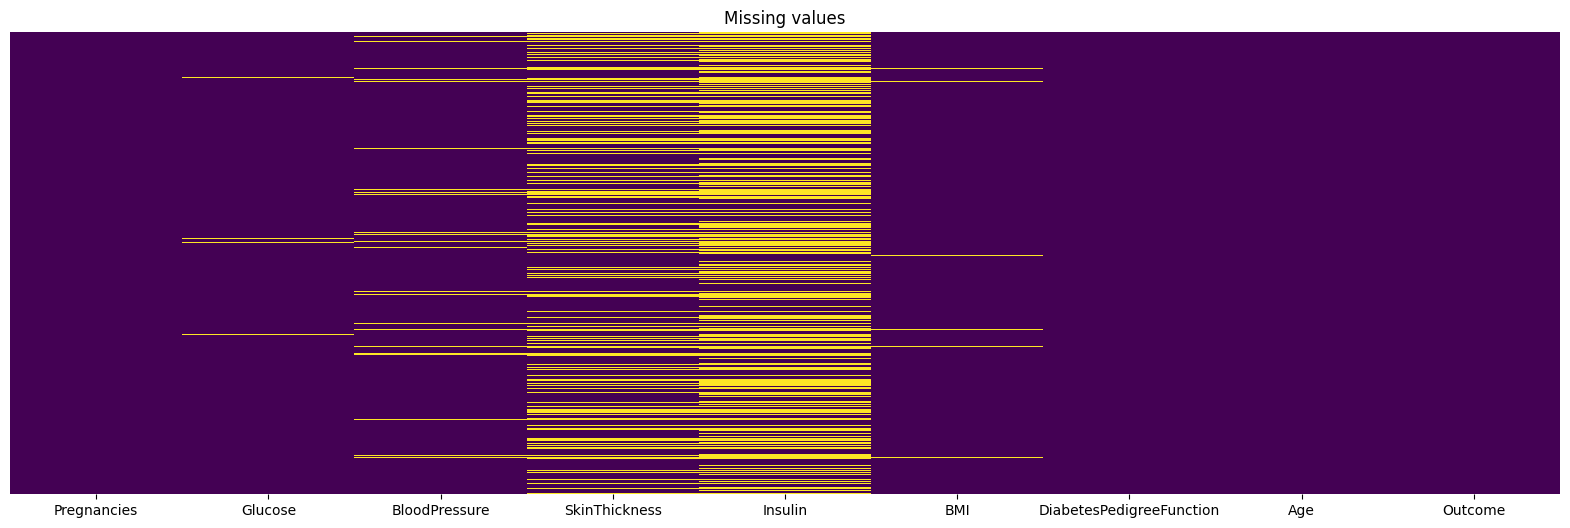

In [124]:
# Let's plot the missing/null values in the dataset
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'viridis')
plt.title("Missing values")

In [125]:
# finding the null values in the dataset 
(df.isnull().sum()*100/len(df)).sort_values(ascending=False)

Insulin                     48.697917
SkinThickness               29.557292
BloodPressure                4.557292
BMI                          1.432292
Glucose                      0.651042
Pregnancies                  0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [126]:
len(df)

768

**Missing values:**
- Insulin = 48.7% - 374
- SkinThickness = 29.56% - 227
- BloodPressure = 4.56% - 35
- BMI = 1.43% - 11
- Glucose = 0.65% - 5

In [127]:
# replace the missing values in Insulin, SkinThickness, BloodPressure, BMI and Glucose with median
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())

df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [128]:
# find the duplicate rows in the dataset 
df.duplicated().sum()

0

In [129]:
df.nunique()

Pregnancies                  17
Glucose                     135
BloodPressure                46
SkinThickness                50
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

<Axes: >

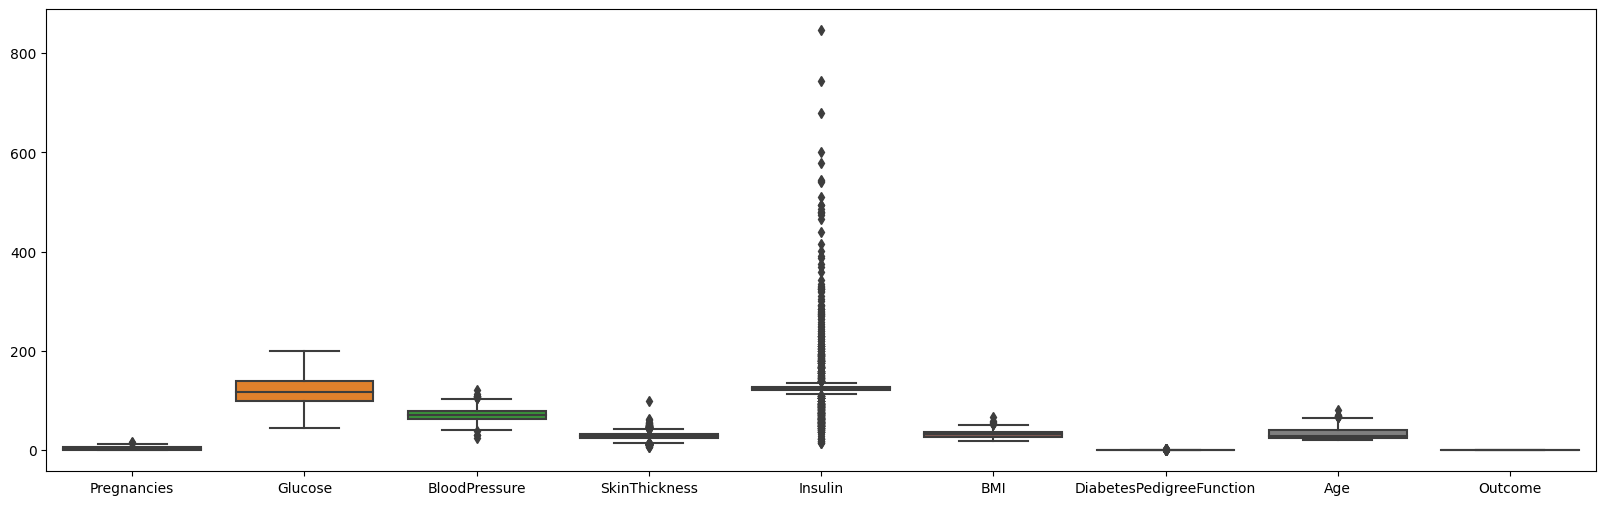

In [130]:
# find the outliers in the dataset 
sns.boxplot(data=df)

In [131]:
# remove the outliers in Insulin using IQR method
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Insulin'] < (Q1 - 1.5 * IQR)) | (df['Insulin'] > (Q3 + 1.5 * IQR)))]


<Axes: >

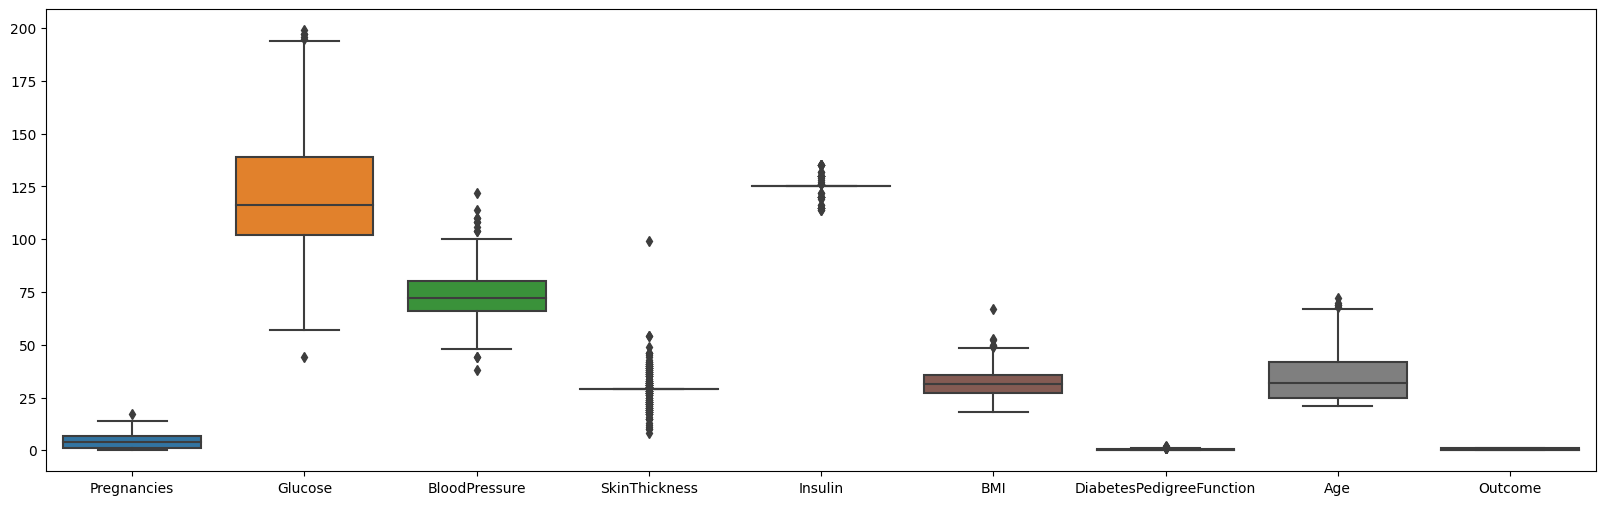

In [132]:
# again find the outliers in the dataset after correcting outliers in Insulin
sns.boxplot(data=df)

In [133]:
# selecting the features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [134]:
# split the data into testing and training sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Logistic Regression Classifier**

Accuracy Score:  0.75
Precision Score:  0.73
Recall Score:  0.52
F1 Score:  0.60
Confusion Matrix:  [[48  6]
 [15 16]]


<Axes: >

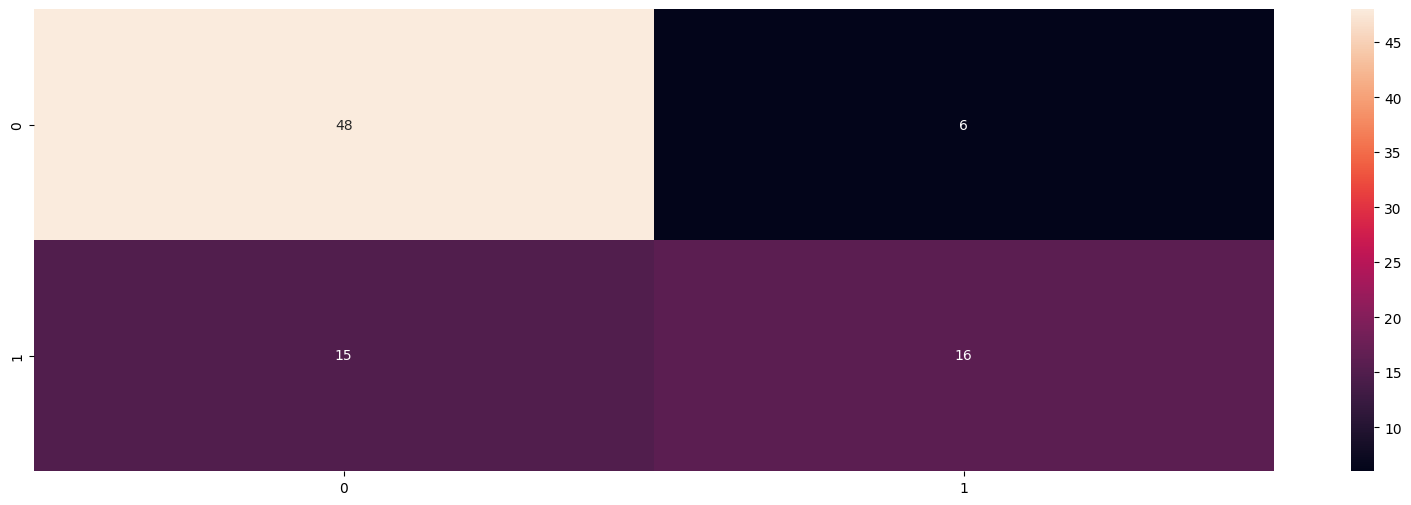

In [135]:
# create a logistic regression model 
model = LogisticRegression()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1score=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score 
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Decision-Tree Classifier**

Accuracy Score:  0.65
Precision Score:  0.51
Recall Score:  0.58
F1 Score:  0.60
Confusion Matrix:  [[37 17]
 [13 18]]


<Axes: >

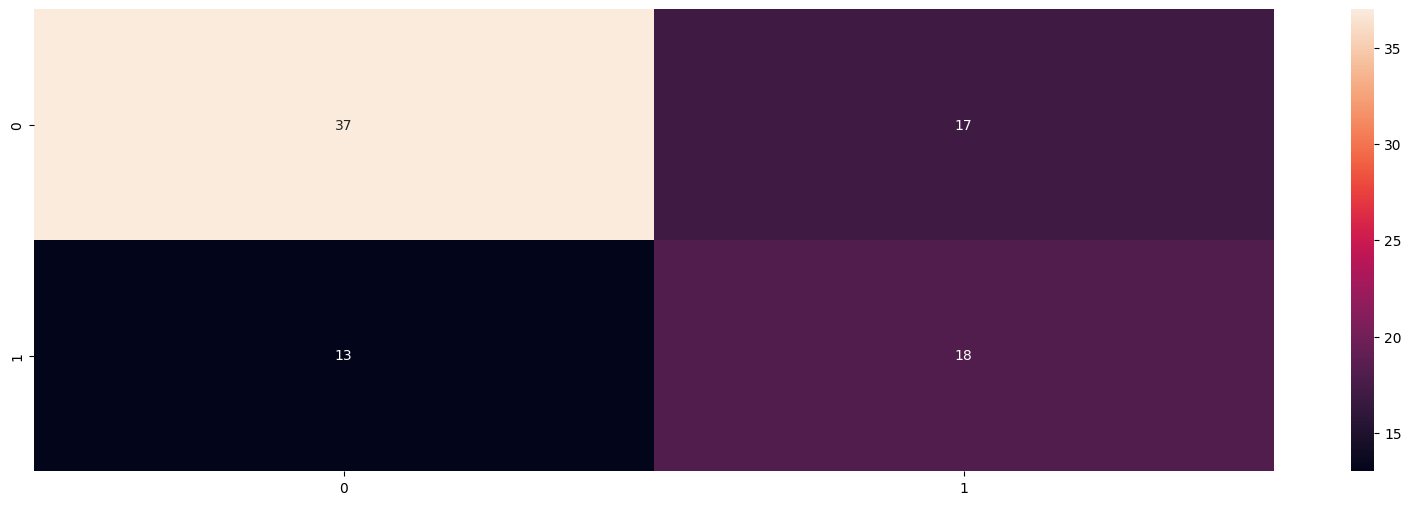

In [136]:
# create a Decision-Tree model 
model = DecisionTreeClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score 
# print the accuracy score, precision score, recall score and f1 score 
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Random Forest Classifier**

Accuracy Score:  0.71
Precision Score:  0.60
Recall Score:  0.58
F1 Score:  0.60
Confusion Matrix:  [[42 12]
 [13 18]]


<Axes: >

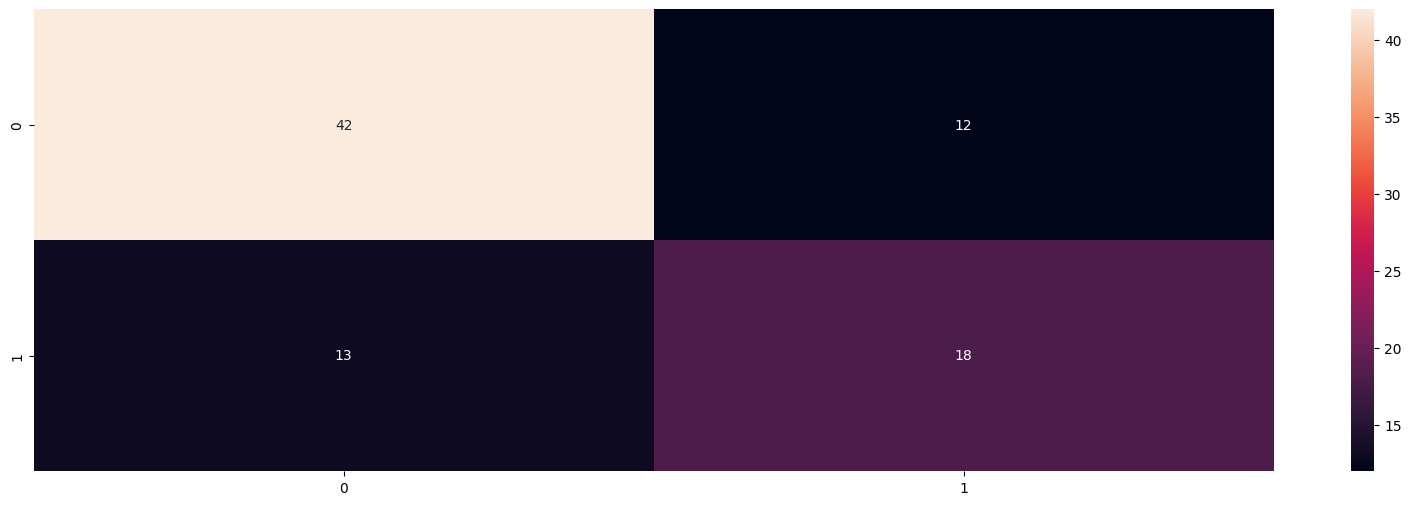

In [137]:
# create a RandomForest Classifier model 
model = RandomForestClassifier(n_jobs=-1,criterion="gini",bootstrap=True,max_depth=200,max_features=6,n_estimators = 100)

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score 
# print the accuracy score, precision score, recall score and f1 score 
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Gradient Boosting Classifier**

Accuracy Score:  0.72
Precision Score:  0.61
Recall Score:  0.61
F1 Score:  0.60
Confusion Matrix:  [[42 12]
 [12 19]]


<Axes: >

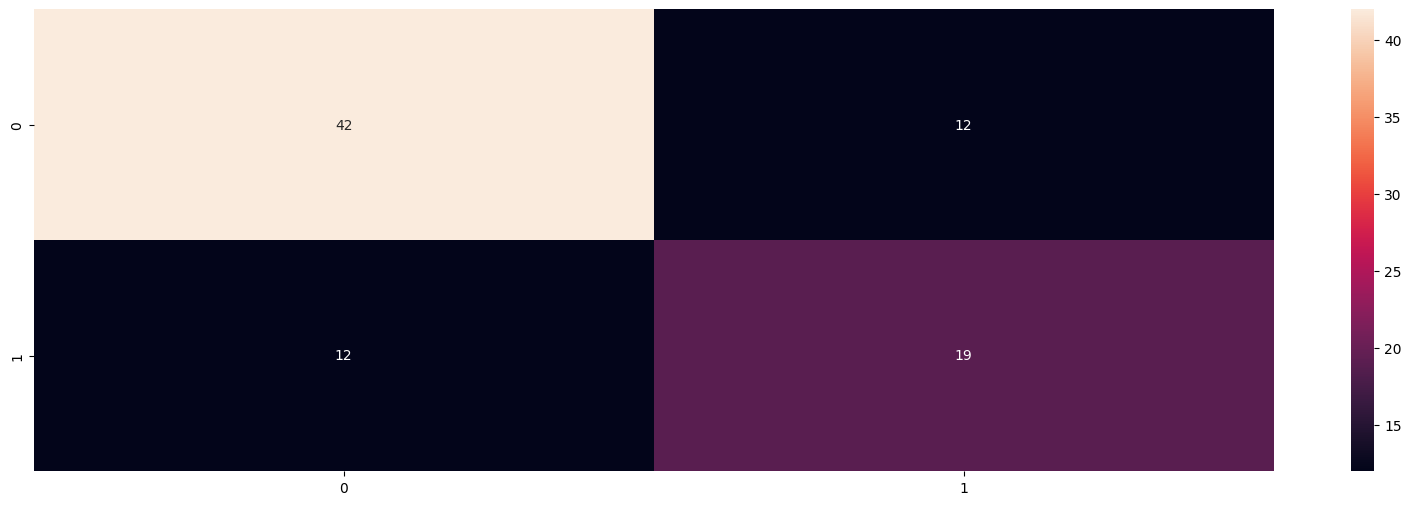

In [138]:
# create a GradientBoosting Classifier model 
model = GradientBoostingClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score 
# print the accuracy score, precision score, recall score and f1 score 
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))


# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [139]:
# model scores
model_scores = {
    "Logistic Regression": 0.75,
    "Decision Tree Classifier": 0.65,
    "Random Forest Classifier": 0.71,
    "Gradient Boosting Classifier": 0.72
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (Greater Values are better):
1. Logistic Regression: 0.75
2. Gradient Boosting Classifier: 0.72
3. Random Forest Classifier: 0.71
4. Decision Tree Classifier: 0.65


## **Scale the features**

In [140]:
# Apply the standard scaler on features (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data into training and test sets, 80% of the entire dataset for
# training and the remaining 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Logistic Regression**

Accuracy Score:  0.74
Precision Score:  0.70
Recall Score:  0.52
F1 Score:  0.60
Confusion Matrix:  [[47  7]
 [15 16]]


<Axes: >

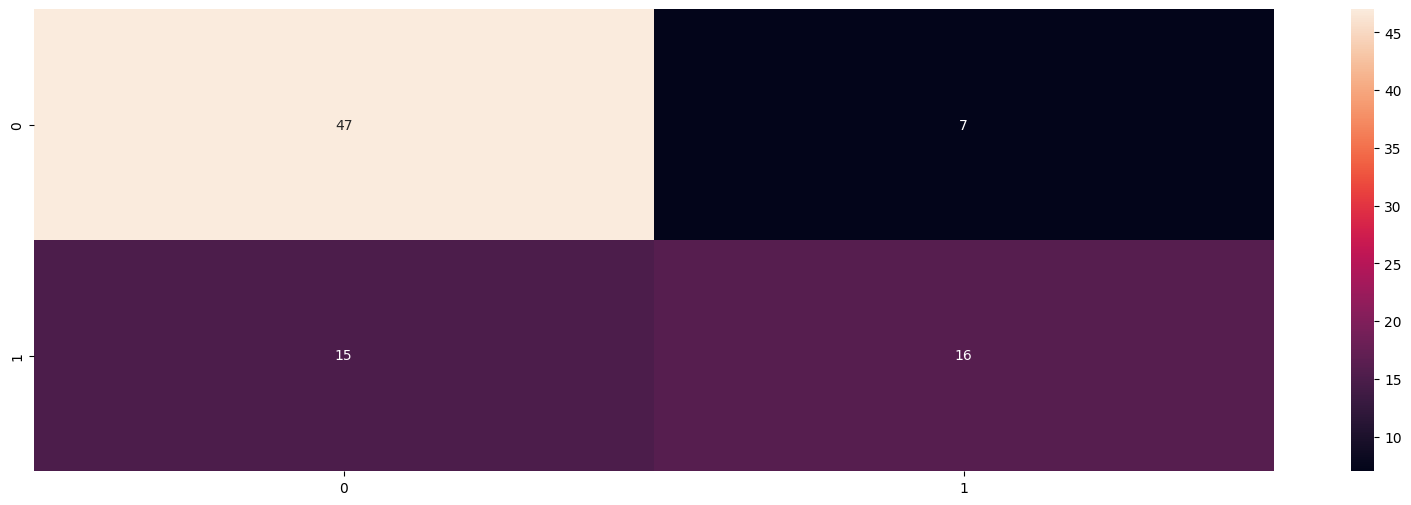

In [141]:
# create a model 
model = LogisticRegression()

# fit the model with data and target variable
model.fit(X_train, y_train)

# predict the model 
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score 
# print the accuracy score, precision score, recall score and f1 score 
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Decision-Tree Classifier**

Accuracy Score:  0.67
Precision Score:  0.55
Recall Score:  0.55
F1 Score:  0.60
Confusion Matrix:  [[40 14]
 [14 17]]


<Axes: >

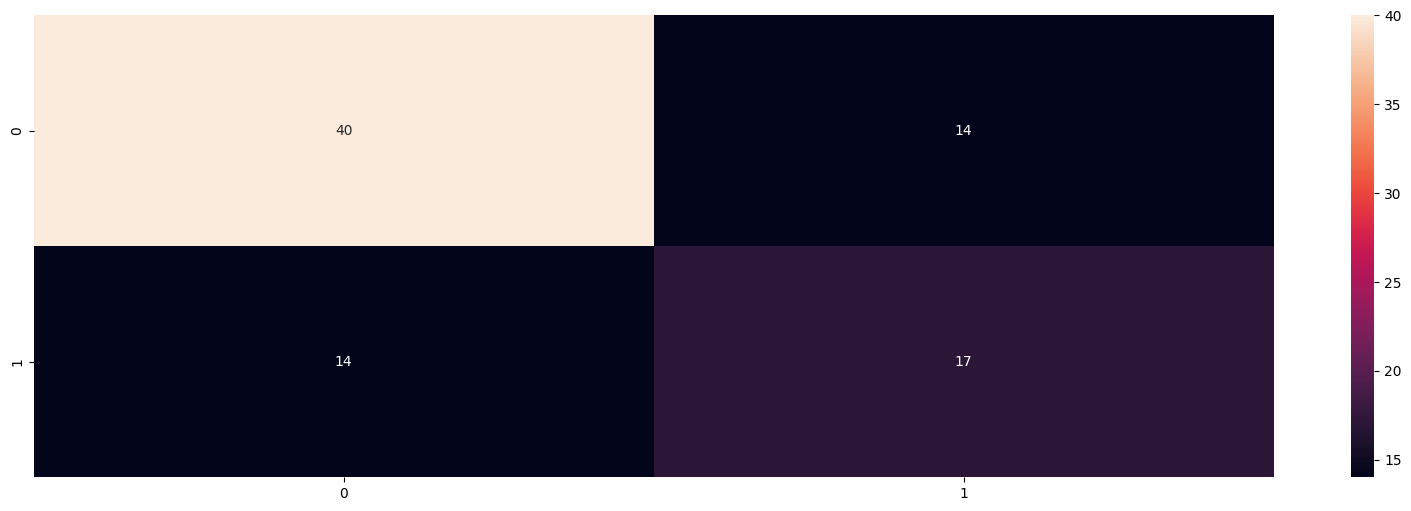

In [142]:
# create a Decision-Tree model 
model = DecisionTreeClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score 
# print the accuracy score, precision score, recall score and f1 score 
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Random Forest Classifier**

Accuracy Score:  0.71
Precision Score:  0.61
Recall Score:  0.55
F1 Score:  0.60
Confusion Matrix:  [[43 11]
 [14 17]]


<Axes: >

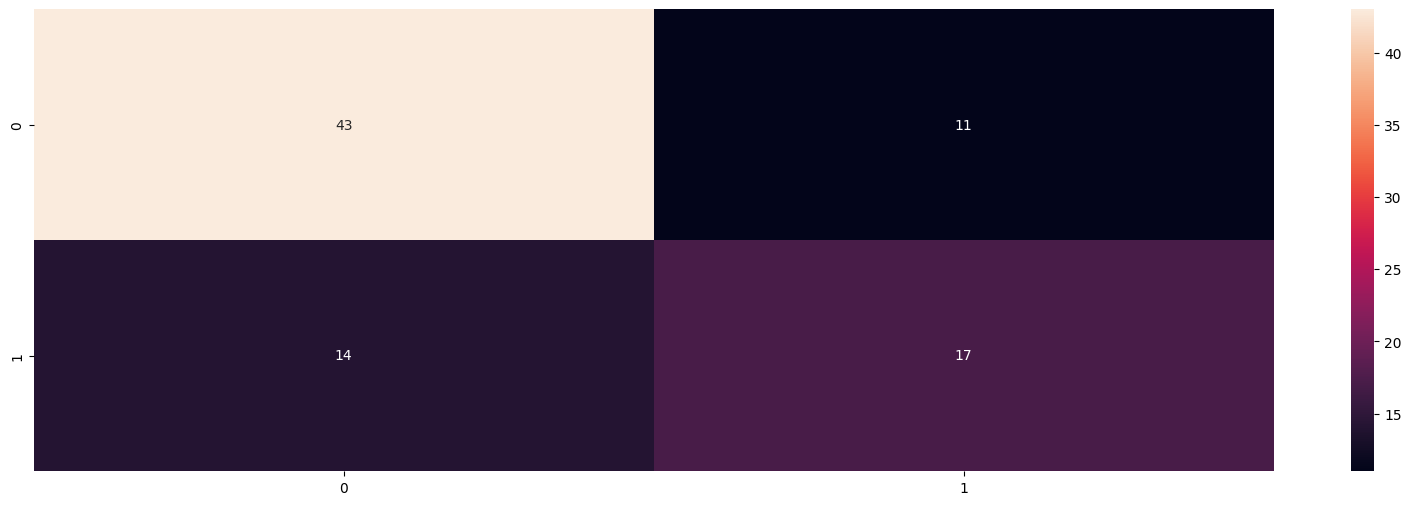

In [143]:
# create a RandomForest Classifier model 
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score 
# print the accuracy score, precision score, recall score and f1 score 
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## **Gradient Boosting Classifier**

Accuracy Score:  0.72
Precision Score:  0.61
Recall Score:  0.61
F1 Score:  0.60
Confusion Matrix:  [[42 12]
 [12 19]]


<Axes: >

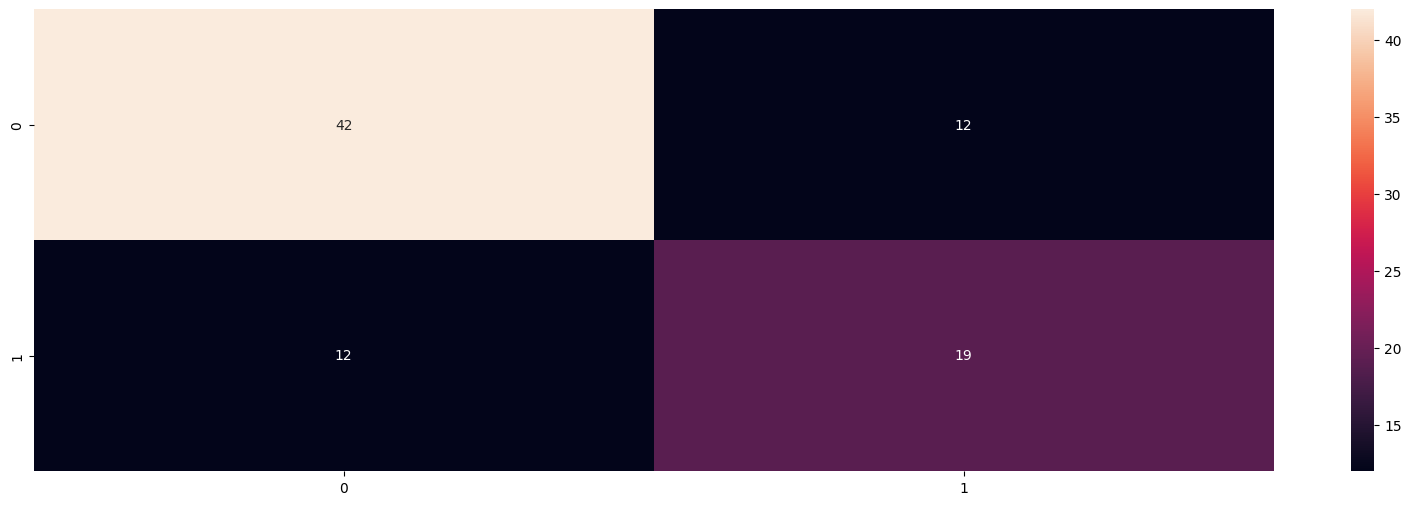

In [144]:
# create a GradientBoosting Classifier model 
model = GradientBoostingClassifier()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
# evaluate the model
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
confusionMatrix=confusion_matrix(y_test, y_pred)

# print the accuracy score, precision score, recall score and f1 score 
# print the accuracy score, precision score, recall score and f1 score 
print('Accuracy Score: ',(f'{accuracy:.2f}'))
print('Precision Score: ',(f'{precision:.2f}'))
print('Recall Score: ',(f'{recall:.2f}'))
print('F1 Score: ',(f'{f1score:.2f}'))
print('Confusion Matrix: ',(confusionMatrix))

# Draw a confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [145]:
# model scores
model_scores = {
    "Logistic Regression": 0.74,
    "Decision Tree Classifier": 0.67,
    "Random Forest Classifier": 0.71,
    "Gradient Boosting Classifier": 0.72
}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (Greater Values are better):
1. Logistic Regression: 0.74
2. Gradient Boosting Classifier: 0.72
3. Random Forest Classifier: 0.71
4. Decision Tree Classifier: 0.67


Aiweeen hi chawal mari hay neechay check it later

Accuracy: 0.7411764705882353
F1 Score: 0.5925925925925926
ROC AUC Score: 0.7921146953405017


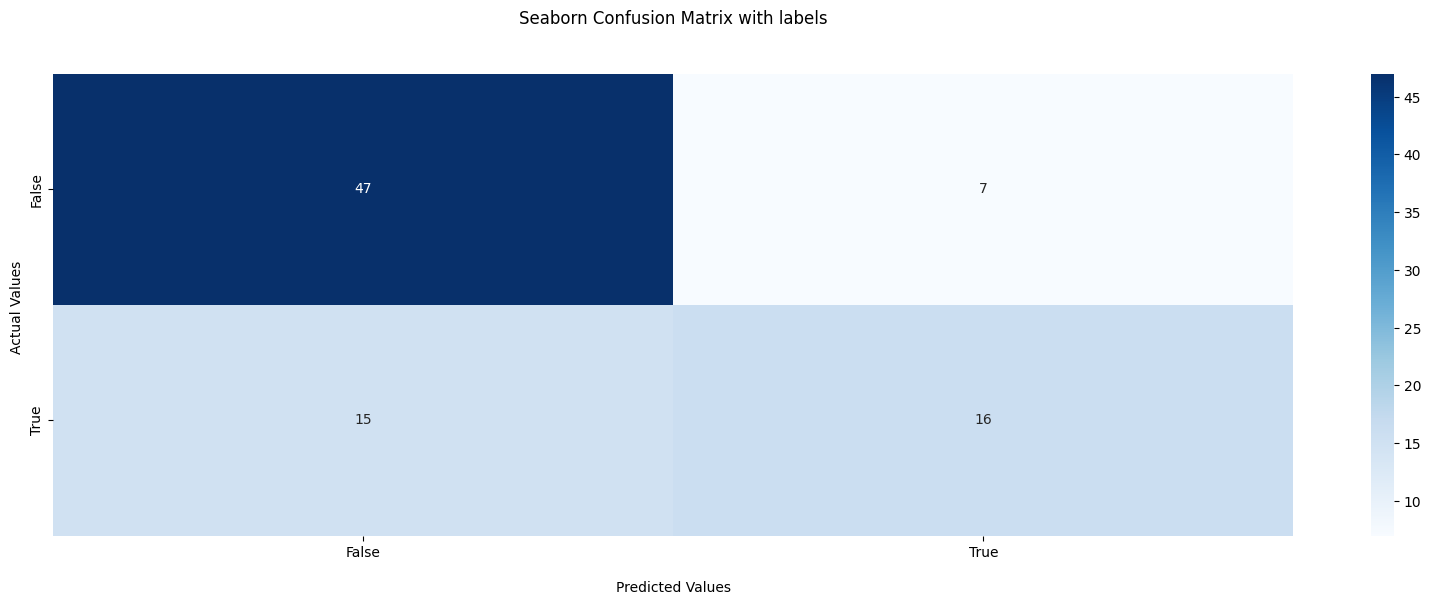

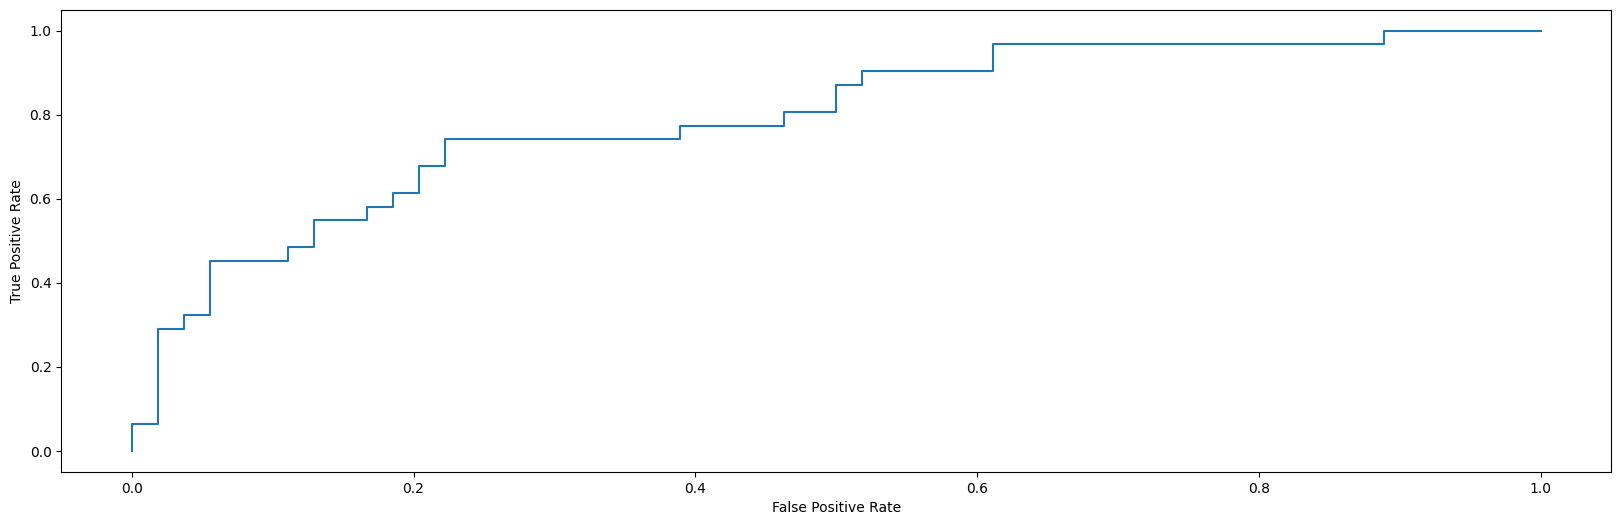

In [150]:
# Create and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on the test set
logreg_pred = logreg_model.predict(X_test)
# Create and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on the test set
logreg_pred = logreg_model.predict(X_test)

# Calculate and print metrics
print("Accuracy:", accuracy_score(y_test, logreg_pred))
print("F1 Score:", f1_score(y_test, logreg_pred))
print("ROC AUC Score:", roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1]))

# Create Confusion Matrix
cf_matrix = confusion_matrix(y_test, logreg_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()

# Create ROC curve
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

General evaluation:

1- All values containing 0(zero) except Pregnancies and Outcome are assigned "NaN".

2- The distribution of missing data was examined.

3- Missing values were replaced by median assignments according to the target variable.

4- Variable types were examined and whether encoding was required or not was analyzed.

5- 15%-85% iqr calculation was made for the outlier values and they were replaced with the lower and upper limit values.

6- Robust was preferred for the scaling method. It was preferred because it has IQR sensitivity.

7- The weight of minority samples was reduced using SMOTE.

8- The model was tested using different machine learning methods.

9- Feature importance analysis was performed.

10- Confusion Matrix and ROC Curve are output.